<a href="https://colab.research.google.com/github/SandipaLakra/Malaria_Diagnosis__/blob/main/_Malaria_diagnosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_datasets as tfds


Data Loading

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete4084QP/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
#0 - parasitized
#1 - unparasitized
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(121, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [ ]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE= len(dataset)

  train_dataset= dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset=dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  val_dataset=val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset=val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

train_dataset, val_dataset, test_dataset= splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

Data Visualization

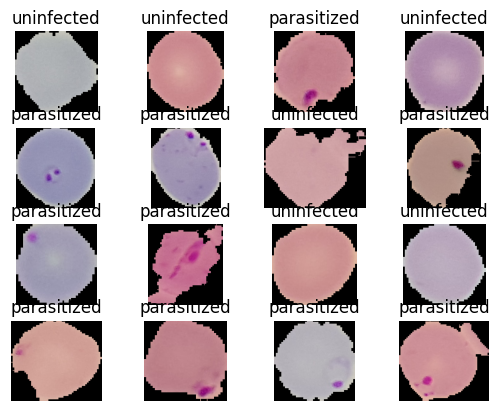

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmp2yaq7uemtfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
print("0 -",dataset_info.features['label'].int2str(0))
print("1 -",dataset_info.features['label'].int2str(1))

0 - parasitized
1 - uninfected


**Data Preprocessing**

In [ ]:
IM_SIZE=224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [ ]:
#Step 1: converting
#Step 2: normalization(min-max)- when the pixel size of the images are different from each other

train_dataset=train_dataset.map(resize_rescale)
val_dataset=val_dataset.map(resize_rescale)
test_dataset=test_dataset.map(resize_rescale)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
BATCH_SIZE=32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

MODEL CREATION


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization

There are three ways model is built in Tensorflow:
1. Sequential API
2. Functional API
3. Model Subclassing

Sequential API

In [ ]:
#lenet_model=Sequential()

#lenet_model.add(Conv2D(filters=6, kernel_size=(3,3), strides=1, padding='valid', activation='relu',input_shape=(IM_SIZE, IM_SIZE, 3)))
#lenet_model.add(BatchNormalization()) #belonging to the same batch are standarized
#lenet_model.add(MaxPool2D())

#lenet_model.add(Conv2D(16,(3,3),1,padding='valid', activation='relu'))
#lenet_model.add(BatchNormalization())
#lenet_model.add(MaxPool2D())

#lenet_model.add(Flatten())

#lenet_model.add(Dense(100, activation='relu'))
#lenet_model.add(BatchNormalization())

#lenet_model.add(Dense(10, activation='relu'))
#lenet_model.add(BatchNormalization())

#lenet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
#lenet_model.summary()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

Functional API

In [ ]:
func_input= Input(shape=(IM_SIZE, IM_SIZE, 3), name="Input Image")

''' Feature Extraction unit '''
x= Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x= BatchNormalization()(x)
x= MaxPool2D(pool_size=2, strides=2)(x)

x= Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x= BatchNormalization()(x)
output= MaxPool2D(pool_size=2, strides=2)(x)


feature_extractor_model=Model(func_input, output, name="Feature_Extractor")
feature_extractor_model.summary()


Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_1 (Bat  (None, 222, 222, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
Total params: 512 (2.00 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 32 (128.00 Byte)
_________________________________________________________________


In [ ]:
func_input= Input(shape=(IM_SIZE, IM_SIZE, 3), name="Input Image")

x= feature_extractor_model(func_input)

x=Flatten()(x)

''' Classification unit '''
x=Dense(100, activation='relu')(x)
x= BatchNormalization()(x)

x=Dense(100, activation='relu')(x)
x= BatchNormalization()(x)

x=Dense(10, activation='relu')(x)
x= BatchNormalization()(x)

func_output=Dense(1, activation='sigmoid')(x)

lenet_model=Model(func_input, func_output, name="Lenet_Model")
lenet_model.summary()


Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 111, 111, 16)      512       
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 100)               19713700  
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               

Model Subclassing ( permits us to create recursively composable layers and models.)

In [ ]:
from tensorflow.keras.layers import Layer


In [ ]:
#FeatureExtractor(Layer)
#init
#call

"""class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor, self).__init__()

    self.conv_1=Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_1=BatchNormalization()
    self.pool_1=MaxPool2D(pool_size=2, strides=2)

    self.conv_2= Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_2= BatchNormalization()
    self.pool_2= MaxPool2D(pool_size=2, strides=2)



    '''Call method- permits us to call each and every layer in init method '''
  def call(self, x, training):
    x=self.conv_1(x)
    x=self.batch_1(x)
    x=self.pool_1(x)

    x=self.conv_2(x)
    x=self.batch_2(x)
    x=self.batch_2(x)

    return x"""




"class FeatureExtractor(Layer):\n  def __init__(self):\n    super(FeatureExtractor, self).__init__()\n\n    self.conv_1=Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')\n    self.batch_1=BatchNormalization()\n    self.pool_1=MaxPool2D(pool_size=2, strides=2)\n\n    self.conv_2= Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')\n    self.batch_2= BatchNormalization()\n    self.pool_2= MaxPool2D(pool_size=2, strides=2)\n\n\n\n    '''Call method- permits us to call each and every layer in init method '''\n  def call(self, x, training):\n    x=self.conv_1(x)\n    x=self.batch_1(x)\n    x=self.pool_1(x)\n\n    x=self.conv_2(x)\n    x=self.batch_2(x)\n    x=self.batch_2(x)\n\n    return x"

Model Training

In [ ]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy, FalseNegatives, FalsePositives, TruePositives, TrueNegatives, Precision, Recall, AUC

metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

In [ ]:
#model compilation

lenet_model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=metrics)

In [ ]:
history= lenet_model.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1)

Epoch 1/10
689/689 [==============================] - 159s 227ms/step - loss: 0.5960 - tp: 7296.0000 - fp: 3335.0000 - tn: 7686.0000 - fn: 3729.0000 - accuracy: 0.6796 - precision: 0.6863 - recall: 0.6618 - auc: 0.7454 - val_loss: 0.8783 - val_tp: 1276.0000 - val_fp: 1101.0000 - val_tn: 308.0000 - val_fn: 70.0000 - val_accuracy: 0.5750 - val_precision: 0.5368 - val_recall: 0.9480 - val_auc: 0.7715
Epoch 2/10
689/689 [==============================] - 156s 226ms/step - loss: 0.5346 - tp: 8013.0000 - fp: 2854.0000 - tn: 8161.0000 - fn: 3018.0000 - accuracy: 0.7336 - precision: 0.7374 - recall: 0.7264 - auc: 0.8079 - val_loss: 1.0140 - val_tp: 1290.0000 - val_fp: 1176.0000 - val_tn: 241.0000 - val_fn: 48.0000 - val_accuracy: 0.5557 - val_precision: 0.5231 - val_recall: 0.9641 - val_auc: 0.7821
Epoch 3/10
689/689 [==============================] - 155s 225ms/step - loss: 0.4517 - tp: 8687.0000 - fp: 2311.0000 - tn: 8712.0000 - fn: 2336.0000 - accuracy: 0.7892 - precision: 0.7899 - recall: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

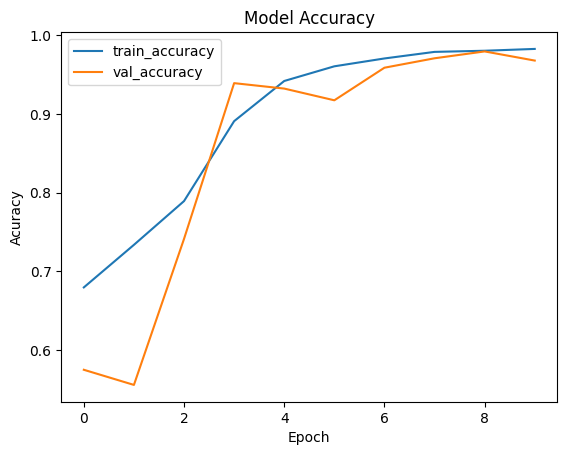

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

Model Evaluation and Testing

In [ ]:
test_dataset = test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
lenet_model.evaluate(test_dataset)

22048/22048 [==============================] - 328s 15ms/step - loss: 0.1810 - tp: 10585.0000 - fp: 686.0000 - tn: 10363.0000 - fn: 414.0000 - accuracy: 0.9501 - precision: 0.9391 - recall: 0.9624 - auc: 0.9822


[0.18095776438713074,
 10585.0,
 686.0,
 10363.0,
 414.0,
 0.9501088261604309,
 0.9391358494758606,
 0.9623602032661438,
 0.9821956157684326]

Visualizing Confusion matrix

In [ ]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve

In [ ]:
labels=[]
inp=[]

for x, y in test_dataset.as_numpy_iterator():
  labels.append(y)
  inp.append(x)

In [ ]:
print(np.array(inp).shape)
print(np.array(inp)[:,0,...].shape)

(22048, 1, 224, 224, 3)
(22048, 224, 224, 3)


In [ ]:
#labels=np.array(i[0] for i in labels)
#print(labels)


In [ ]:
predicted = lenet_model.predict(np.array(inp)[:,0,...])
print(predicted[:,0])

689/689 [==============================] - 29s 42ms/step
[9.4282354e-04 2.5358170e-03 3.9232001e-02 ... 9.9989492e-01 7.2513926e-01
 2.0524043e-04]


In [ ]:
'''threshold = 0.5

cm = confusion_matrix(labels, predicted > threshold)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix - {}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')'''

"threshold = 0.5\n\ncm = confusion_matrix(labels, predicted > threshold)\nprint(cm)\nplt.figure(figsize=(8,8))\n\nsns.heatmap(cm, annot=True,)\nplt.title('Confusion matrix - {}'.format(threshold))\nplt.ylabel('Actual')\nplt.xlabel('Predicted')"

ROC Plots

In [ ]:
'''fp, tp, thresholds = roc_curve(labels, predicted)

plt.plots(fp, tp)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

plt.grid()

skip = 20

for i in range(0, len(thresholds), skip):
  plt.text(fp[i], tp[i], thresholds[i])

plt.show'''

'fp, tp, thresholds = roc_curve(labels, predicted)\n\nplt.plots(fp, tp)\nplt.xlabel("False Positive rate")\nplt.ylabel("True Positive rate")\n\nplt.grid()\n\nskip = 20\n\nfor i in range(0, len(thresholds), skip):\n  plt.text(fp[i], tp[i], thresholds[i])\n\nplt.show'

In [ ]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 0s 342ms/step


'P'

In [ ]:
def parasite_or_not(x):
  if x<0.5:
    return str('P')
  else:
    return str('U')


1/1 [==============================] - 0s 34ms/step


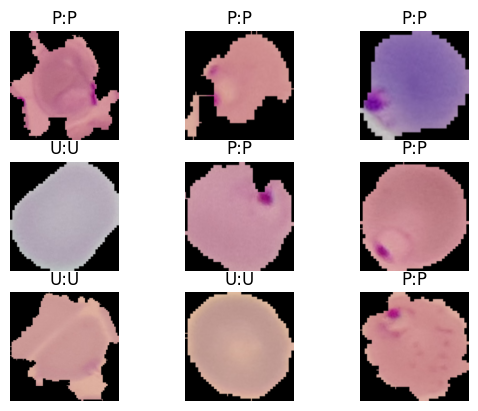

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax=plt.subplot(3,3, i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))

  plt.axis('off')


Saving to and Loading from Google Drive

In [ ]:
#lenet_model.save("lenet")

In [ ]:
#lenet_loaded_model = tf.keras.models.load_model("lenets")
#lenet_loaded_model.summary()


In [ ]:
lenet_model.save("lenet.hdf5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
lenet_loaded_model = tf.keras.models.load_model("lenet.hdf5")
lenet_loaded_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 111, 111, 16)      512       
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 100)               19713700  
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               

In [ ]:
lenet_model.save_weights("weights/lenet_weights")

In [ ]:
lenet_weights_model = lenet_model.load_weights("weights/lenet_weights")
